# Dating App Review Projects

## Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator

In [2]:
df_bum = pd.read_csv("bumble_google_play_reviews.csv")
df_tin = pd.read_csv("tinder_google_play_reviews.csv")
df_hin = pd.read_csv("hinge_google_play_reviews.csv")

In [3]:
df_bum.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,bf09317b-a399-4e92-b896-6a93c9406eda,Terrence Harris-Hughes,https://play-lh.googleusercontent.com/a/AEdFTp...,Why games? Can't we just do it. If you just go...,1,16,NaN,2022-12-11 01:55:12,NaN,NaN
1,97493fcd-70d3-47de-b636-edd95a084b2a,Aksheta Chougaonkar,https://play-lh.googleusercontent.com/a/AEdFTp...,There is bug in security code. I cannot just s...,1,0,5.298.0,2022-12-11 01:48:17,NaN,NaN
2,8edc37a4-45da-4a28-9d92-fff18f14f8f9,leila nasimi,https://play-lh.googleusercontent.com/a-/AD5-W...,"The app is good and user-friendly, but there i...",3,0,5.298.0,2022-12-11 01:15:03,NaN,NaN
3,30fe19dd-264c-47bc-b301-5b085d1d5e1c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,-2 stars. Screw these moneygrabbing bastards,1,2,5.284.0,2022-12-11 00:51:53,If there's anything we can do to help make you...,2022-09-04 13:37:26
4,a5aaed6a-2dd5-41f3-9cc5-7e64d398235e,Joey B,https://play-lh.googleusercontent.com/a/AEdFTp...,Very small stupid things that make it annoying...,2,0,5.298.0,2022-12-11 00:21:16,NaN,NaN


In [4]:
df_tin.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,e6d3a576-c0b5-456d-a161-a03a21635390,Kranan Vlogs,https://play-lh.googleusercontent.com/a-/AD5-W...,soon.,5,0,13.23.0,2022-12-15 21:04:58,NaN,NaN
1,acb008f0-be43-4363-83c4-35581ed81c22,Aayush Gautam,https://play-lh.googleusercontent.com/a-/AD5-W...,A fraud app. Even if you go with gold or premi...,1,0,13.23.0,2022-12-15 20:52:36,NaN,NaN
2,2bd80134-54b6-4363-9c70-2fa8023b49e3,Stinkin Dinkins,https://play-lh.googleusercontent.com/a-/AD5-W...,honestly I'm a thicker guy. so I know I wouldn...,1,0,13.23.0,2022-12-15 20:47:40,NaN,NaN
3,f52d8a14-e901-472e-8fe6-40f2c7f4b931,king catnip,https://play-lh.googleusercontent.com/a-/AD5-W...,I've swiped left on the same people more than ...,1,208,13.10.1,2022-12-15 20:45:36,NaN,NaN
4,e62d8632-a665-4f39-bbcf-fa4c7bc36402,Nicholas Scull,https://play-lh.googleusercontent.com/a-/AD5-W...,Got banned for being genderfluid! All I did wa...,1,0,NaN,2022-12-15 20:39:54,NaN,NaN


In [5]:
df_hin.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,1910bbde-e48d-43d6-ac0a-fe516b07ddca,Aaron Osborne,https://play-lh.googleusercontent.com/a-/AD5-W...,This used to be a great app but it has been ru...,1,116,9.11.2,2022-12-10 01:28:46,NaN,NaN
1,ed8b6d91-6a79-4bc4-8e53-bfa90a4d13dd,Frank Jandl,https://play-lh.googleusercontent.com/a-/AD5-W...,Not that great. Maybe I live in the wrong area...,2,0,9.11.2,2022-12-10 01:28:00,NaN,NaN
2,d58dd19e-c6b7-469e-be8f-25a83d397319,H,https://play-lh.googleusercontent.com/a/AEdFTp...,Used to like the app before a TON of male scam...,1,3,9.9.1,2022-12-10 01:23:20,NaN,NaN
3,b6769fa8-28b4-4e02-bcc3-fa09ea832134,Omar Sharif,https://play-lh.googleusercontent.com/a-/AD5-W...,The sms pin no longer comes through. i made no...,1,0,8.30.0,2022-12-10 00:55:46,NaN,NaN
4,ad4fc20a-2add-465d-8d73-fcbf4a0f1aca,Logan Z,https://play-lh.googleusercontent.com/a/AEdFTp...,Have to pay 15$minimum to like any attractive ...,1,0,9.11.2,2022-12-09 23:50:14,NaN,NaN


In [6]:
print("Bumble Data Features: " + str(list(df_bum.columns)))
print("Hinge Data Features: " + str(list(df_hin.columns)))
print("Tinder Data Features: " + str(list(df_tin.columns)))

Bumble Data Features: ['reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt']
Hinge Data Features: ['reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt']
Tinder Data Features: ['reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt']


In [7]:
print("Data types of each column of Bumble DF")
df_bum.dtypes

Data types of each column of Bumble DF


reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
dtype: object

In [8]:
print("Data types of each column of Hinge DF")
df_hin.dtypes

Data types of each column of Hinge DF


reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
dtype: object

In [9]:
print("Data types of each column of Tinder DF")
df_tin.dtypes

Data types of each column of Tinder DF


reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
dtype: object

In [10]:
print(df_hin['score'].unique())
print(df_bum['score'].unique())
print(df_tin['score'].unique())

[1 2 3 5 4]
[1 3 2 5 4]
[5 1 4 2 3 0]


## Dataset Features

* `content`(object): User's review (txt)

* `score` (int64): Review score ranging from 0 to 5

* `thumbsUpCount` (int64): Number of users who found the review response helpful

* `reviewCreatedVersion` (object): Version of the app when the review was posted

* `at` (objet): Date of review was posted

In [11]:
features = ["content","score","thumbsUpCount","reviewCreatedVersion","at"]

In [12]:
df_bum2 = df_bum[features]
df_hin2 = df_hin[features]
df_tin2 = df_tin[features]

df_bum2.insert(0,'app',"B")
df_hin2.insert(0,'app',"H")
df_tin2.insert(0,'app',"T")

In [13]:
df = pd.concat([df_bum2, df_hin2, df_tin2])
df.insert(0,"id",df.index+1)

In [14]:
# Remove the rows where content is missing
df['NA'] = df['content'].isnull()
df = df[df['NA'] == False]
df.pop("NA")
df.head()

,id,app,content,score,thumbsUpCount,reviewCreatedVersion,at
0,1,B,Why games? Can't we just do it. If you just go...,1,16,NaN,2022-12-11 01:55:12
1,2,B,There is bug in security code. I cannot just s...,1,0,5.298.0,2022-12-11 01:48:17
2,3,B,"The app is good and user-friendly, but there i...",3,0,5.298.0,2022-12-11 01:15:03
3,4,B,-2 stars. Screw these moneygrabbing bastards,1,2,5.284.0,2022-12-11 00:51:53
4,5,B,Very small stupid things that make it annoying...,2,0,5.298.0,2022-12-11 00:21:16


## Text Analysis

In [15]:
def processText(text):
    text = text.str.replace("(<br/>)", "")
    text = text.str.replace('(<a).*(>).*(</a>)', '')
    text = text.str.replace('(&amp)', '')
    text = text.str.replace('(&gt)', '')
    text = text.str.replace('(&lt)', '')
    text = text.str.replace('(\xa0)', ' ')
    return text

In [16]:
df['content'] = processText(df['content'])

<ipython-input-15-c6ebaa710e07>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace("(<br/>)", "")
<ipython-input-15-c6ebaa710e07>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('(<a).*(>).*(</a>)', '')
<ipython-input-15-c6ebaa710e07>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('(&amp)', '')
<ipython-input-15-c6ebaa710e07>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('(&gt)', '')
<ipython-input-15-c6ebaa710e07>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('(&lt)', '')
<ipython-input-15-c6ebaa710e07>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.st

In [17]:
df['polarity'] = df['content'].map(lambda txt: TextBlob(txt).sentiment.polarity)
df['reviewLen'] = df['content'].astype(str).apply(len)
df['wordCount'] = df['content'].apply(lambda x: len(str(x).split()))

In [18]:
df.head()

,id,app,content,score,thumbsUpCount,reviewCreatedVersion,at,polarity,reviewLen,wordCount
0,1,B,Why games? Can't we just do it. If you just go...,1,16,NaN,2022-12-11 01:55:12,-1.000000,131,26
1,2,B,There is bug in security code. I cannot just s...,1,0,5.298.0,2022-12-11 01:48:17,-0.250000,86,19
2,3,B,"The app is good and user-friendly, but there i...",3,0,5.298.0,2022-12-11 01:15:03,0.235863,420,78
3,4,B,-2 stars. Screw these moneygrabbing bastards,1,2,5.284.0,2022-12-11 00:51:53,0.000000,44,6
4,5,B,Very small stupid things that make it annoying...,2,0,5.298.0,2022-12-11 00:21:16,-0.390000,206,36


In [19]:
df_bum2 = df.loc[df.app == 'B']
df_hin2 = df.loc[df.app == 'H']
df_tin2 = df.loc[df.app == 'T']

### List out reviews based on polarity scores

In [20]:
def listPolarity(df, pol, col_name, n):
    col = df.loc[df.polarity == pol, [col_name]].sample(n).values
    for c in col:
        print(c[0])

#### Bumble

In [21]:
print("Bumble reviews with the highest positive sentiment polarity: ")
print("-----------------------------------------------------")
listPolarity(df_bum2, 1, 'content', 5)
print("")
print("Bumble reviews with most neutral sentiment polarity: ")
print("-----------------------------------------------")
listPolarity(df_bum2, 0, 'content', 5)
print("")
print("Bumble reviews with the highest negative sentiment polarity: ")
print("------------------------------------------------------")
listPolarity(df_bum2, -1, 'content', 5)

Bumble reviews with the highest positive sentiment polarity: 
-----------------------------------------------------
Great!
It's awesome but can I use it to find a guy for my sister?
Why do I keep on getting the "All caught up" page??? Bumble is a good app and all but I can't use it if everytime I get on and swipe twice I'm all caught up!!! There's no way I should be all caught up if over 5 million ppl have this app.
Excellent
One of the best 👌 singles dating sites...l recommend 👌

Bumble reviews with most neutral sentiment polarity: 
-----------------------------------------------
Every 30 seconds i get a photo thingy that wont lemme do anytging in the app please fix it!
No in depth LGBT options, only seeking woman or seeking mam
Cannot find my connection today. Restarted, reinstalled, wifi or cellular still says no service
This is the biggest f...king joke , all about money
Not enough matches. No one talk in this app

Bumble reviews with the highest negative sentiment polarity: 
-----

#### Hinge

In [22]:
print("Hinge reviews with the highest positive sentiment polarity: ")
print("-----------------------------------------------------")
listPolarity(df_hin2, 1, 'content', 5)
print("")
print("Hinge reviews with most neutral sentiment polarity: ")
print("-----------------------------------------------")
listPolarity(df_hin2, 0, 'content', 5)
print("")
print("Hinge reviews with the highest negative sentiment polarity: ")
print("------------------------------------------------------")
listPolarity(df_hin2, -1, 'content', 5)

Hinge reviews with the highest positive sentiment polarity: 
-----------------------------------------------------
Best dating app out there for shurtles
People aren't thirsty, sex cravings mongrels on here, so it's a great app!
Great!
Incredible!
Great app!

Hinge reviews with most neutral sentiment polarity: 
-----------------------------------------------
clunky on android
Distance is an issue. If I put 50 mi as a deal breaker, don't show me people over 50 miles away.
I like how the app gives you the option to make a comment with the like. I wish it was almost a requirement so that it's not just a swipe and go.
It's just about milking, big time scam.
Glitches in the app causes deletion of chats and you lose connection with your matches in the middle of conversation. Notifications tell you that they sent a message but you can't read or respond. No customer support help or solution and no way to contact matches.

Hinge reviews with the highest negative sentiment polarity: 
-----------

#### Tinder

In [23]:
print("Tinder reviews with the highest positive sentiment polarity: ")
print("-----------------------------------------------------")
listPolarity(df_tin2, 1, 'content', 5)
print("")
print("Tinder reviews with most neutral sentiment polarity: ")
print("-----------------------------------------------")
listPolarity(df_tin2, 0, 'content', 5)
print("")
print("Tinder reviews with the highest negative sentiment polarity: ")
print("------------------------------------------------------")
listPolarity(df_tin2, -1, 'content', 5)

Tinder reviews with the highest positive sentiment polarity: 
-----------------------------------------------------
It's really best.
Best
Perfect!
Awesome app
Awesome

Tinder reviews with most neutral sentiment polarity: 
-----------------------------------------------
Eeeeeerrrrrrrrrrrrrmmmmmmmm
Paid 16 dollars a month to see who likes you? 🤷‍♂️
I like it💞
Seal of approval
Nyc app

Tinder reviews with the highest negative sentiment polarity: 
------------------------------------------------------
app is horrible have to pay just to look at your likes
Blasphemously Boring
this app is pathetic
This is the worst app
Awful


#### Overall Apps

In [24]:
print("Overall reviews with the highest positive sentiment polarity: ")
print("-----------------------------------------------------")
listPolarity(df, 1, 'content', 5)
print("")
print("Overall reviews with most neutral sentiment polarity: ")
print("-----------------------------------------------")
listPolarity(df, 0, 'content', 5)
print("")
print("Overall reviews with the highest negative sentiment polarity: ")
print("------------------------------------------------------")
listPolarity(df, -1, 'content', 5)

Overall reviews with the highest positive sentiment polarity: 
-----------------------------------------------------
This is the best dating app ever😚
best way to diversify your portfolio
Perfect set
The best app
The best dating app

Overall reviews with most neutral sentiment polarity: 
-----------------------------------------------
No issues
Got it to work and now I'm changing my review
Application
cant sign in with my facebook login screen re appears please fix
Can anyone explain y I can't log in with face book?

Overall reviews with the highest negative sentiment polarity: 
------------------------------------------------------
worst app 👎👎👎👎
I wouldn't even give it a 1 star. You can't see who likes you unless you pay. I'm not going to pay money to find a woman. That's like prostitution! Pay to see what you can get.... DUMB!!!!!!
Horrible sub cancelation process
Worst
Bans you without saying why and then you cant refute it at all, terrible way of managing its members


## Data Visualization

### App Review Score Distribution

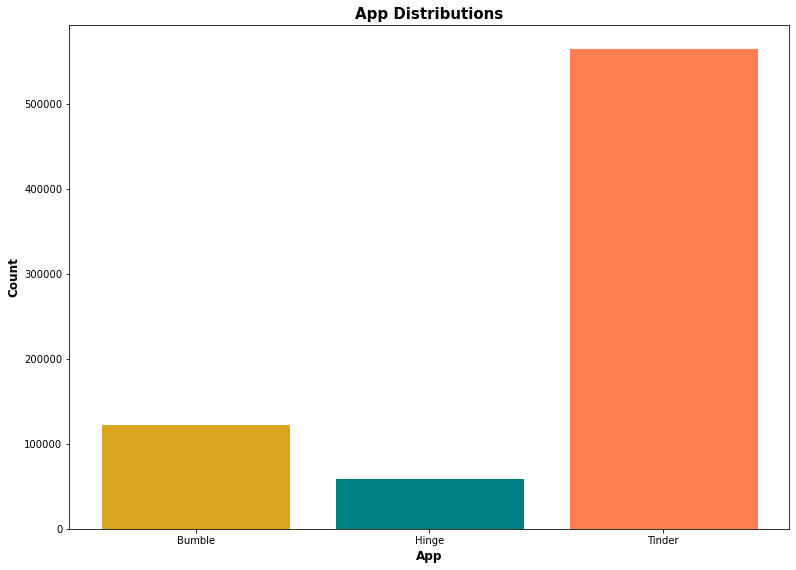

In [25]:
app = np.array(df['app'])
app, counts_app = np.unique(app, return_counts = True)
labels = ['Bumble', 'Hinge', 'Tinder']

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bar = plt.bar(x = app, height = counts_app, color = 'royalblue', edgecolor = 'black')
bar[0].set_color('goldenrod')
bar[1].set_color('teal')
bar[2].set_color('coral')
plt.title("App Distributions", weight = "bold", fontsize = 15)
plt.xlabel("App", weight = "bold", fontsize = 12)
plt.xticks(app, labels)
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

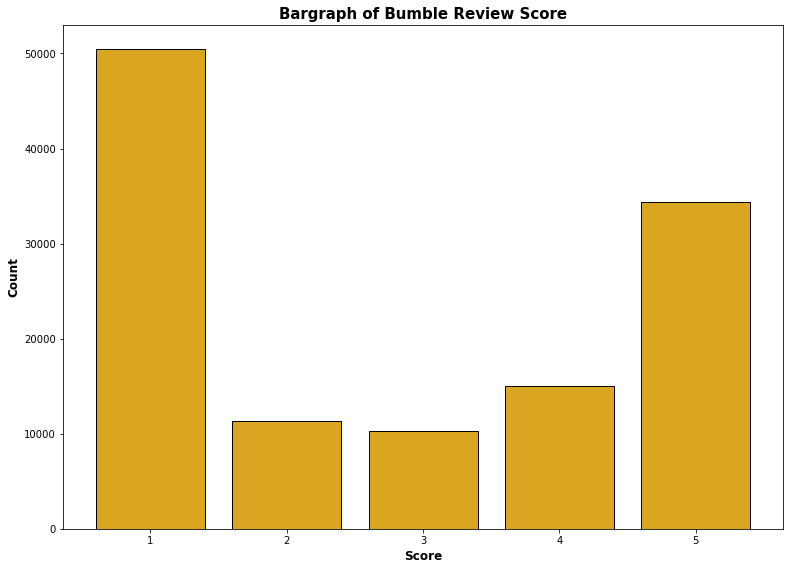

In [26]:
score_bum = np.array(df_bum2['score'])
score_bum, counts_bum = np.unique(score_bum, return_counts = True)

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = score_bum, height = counts_bum, color = 'goldenrod', edgecolor = 'black')
plt.title("Bargraph of Bumble Review Score", weight = "bold", fontsize = 15)
plt.xlabel("Score", weight = "bold", fontsize = 12)
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

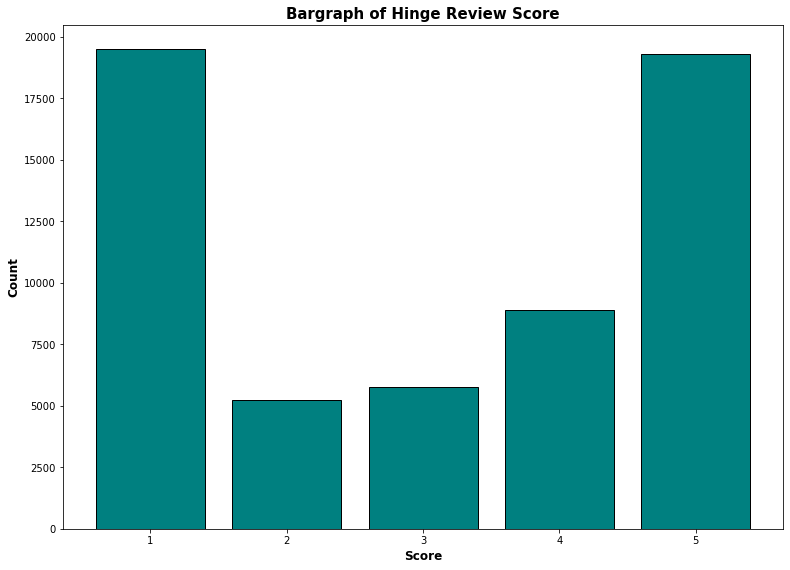

In [27]:
score_hin = np.array(df_hin2['score'])
score_hin, counts_hin = np.unique(score_hin, return_counts = True)

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = score_hin, height = counts_hin, color = 'teal', edgecolor = 'black')
plt.title("Bargraph of Hinge Review Score", weight = "bold", fontsize = 15)
plt.xlabel("Score", weight = "bold", fontsize = 12)
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

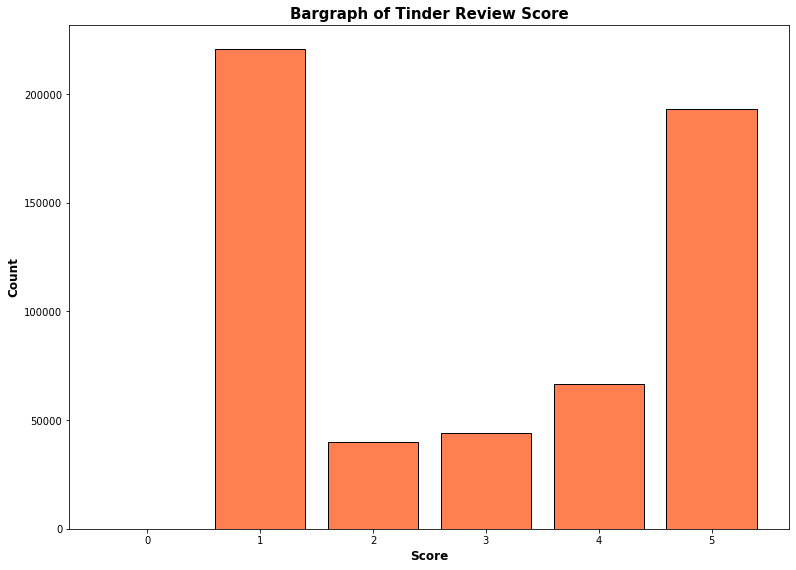

In [28]:
score_tin = np.array(df_tin2['score'])
score_tin, counts_tin = np.unique(score_tin, return_counts = True)

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = score_tin, height = counts_tin, color = 'coral', edgecolor = 'black')
plt.title("Bargraph of Tinder Review Score", weight = "bold", fontsize = 15)
plt.xlabel("Score", weight = "bold", fontsize = 12)
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

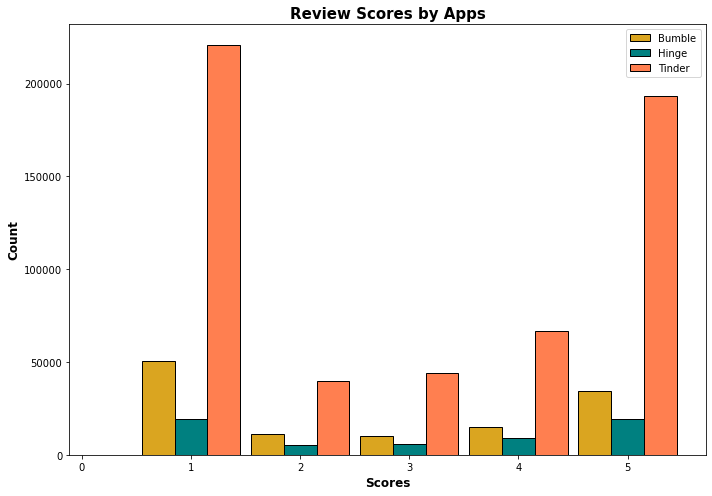

In [29]:
width = 0.30  # the width of the bars
fig, ax = plt.subplots(figsize=(10, 7))
rects1 = ax.bar(score_bum - width, counts_bum, width, color = 'goldenrod', edgecolor = 'black', label='Bumble')
rects2 = ax.bar(score_hin, counts_hin, width, color = 'teal', edgecolor = 'black', label='Hinge')
rects2 = ax.bar(score_tin + width, counts_tin, width,  color = 'coral', edgecolor = 'black',label='Tinder')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Scores', weight = 'bold', fontsize = 12)
ax.set_ylabel('Count', weight = 'bold', fontsize = 12)
ax.set_title('Review Scores by Apps', weight = 'bold', fontsize = 15)
ax.legend()
fig.tight_layout()
plt.show()

### Score: Polarity Distribution

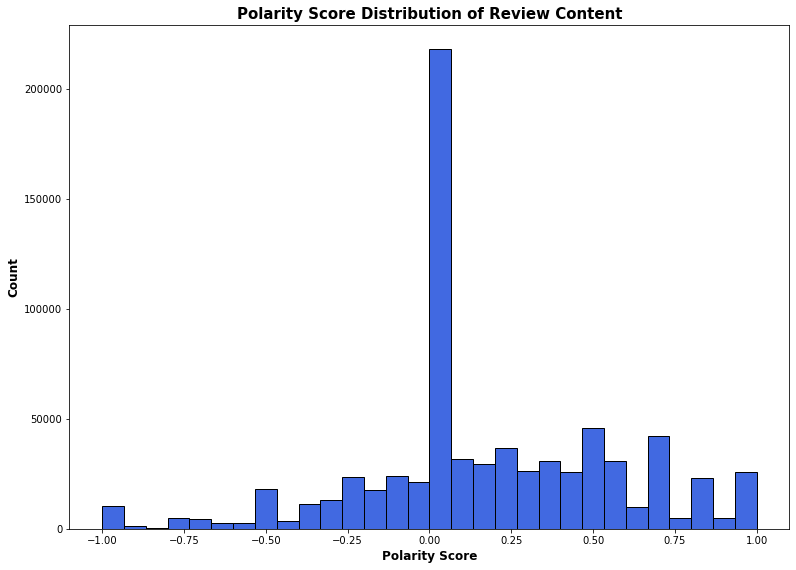

In [30]:
score_pol = np.array(df['polarity'])

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.hist(x = score_pol, color = 'royalblue', edgecolor = 'black', bins = 30)
plt.title("Polarity Score Distribution of Review Content", weight = "bold", fontsize = 15)
plt.xlabel("Polarity Score", weight = "bold", fontsize = 12)
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

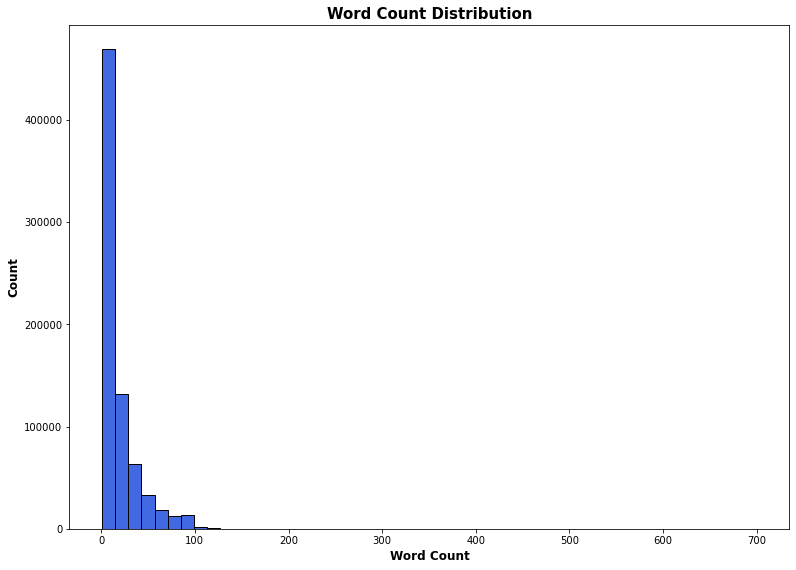

In [32]:
word_count = np.array(df['wordCount'])

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.hist(x = word_count, color = 'royalblue', edgecolor = 'black', bins = 50)
plt.title("Word Count Distribution", weight = "bold", fontsize = 15)
plt.xlabel("Word Count", weight = "bold", fontsize = 12)
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

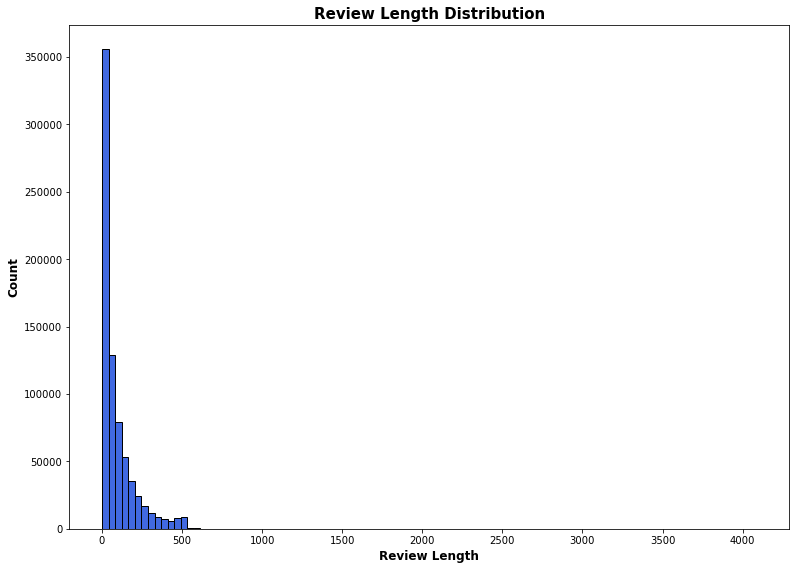

In [31]:
review_len = np.array(df['reviewLen'])

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.hist(x = review_len, color = 'royalblue', edgecolor = 'black',  bins = 100)
plt.title("Review Length Distribution", weight = "bold", fontsize = 15)
plt.xlabel("Review Length", weight = "bold", fontsize = 12)
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

In [80]:
text = " ".join(i for i in df.content)

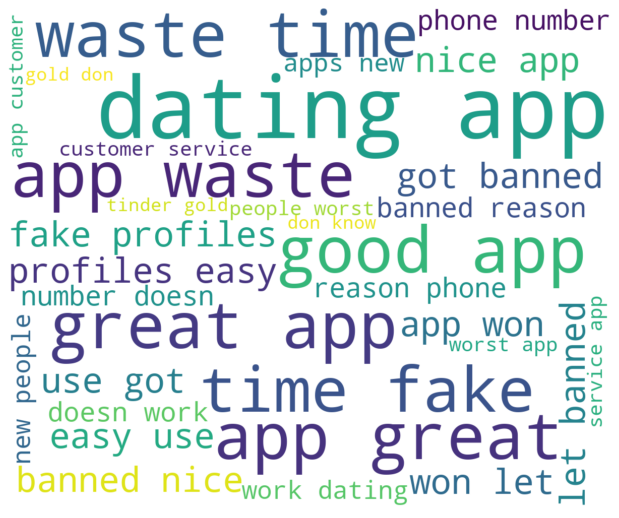

In [86]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
wordcloud = WordCloud(background_color = 'white',
                     width = 1200,
                     height = 1000,
                     collocation_threshold = 3
                     ).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Top Unigram Words After Removing Stop Words

In [35]:
# common k-pair words after removing stop words
def getTopKWords(k, corpus, n = None):
    vec = CountVectorizer(ngram_range = (k,k), stop_words = 'english').fit(corpus)
    bag_words = vec.transform(corpus)
    sum_words = bag_words.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [36]:
cmn_words = getTopKWords(1, df['content'], 20)
bum_cmn_words = getTopKWords(1, df_bum2['content'], 20)
hin_cmn_words = getTopKWords(1, df_hin2['content'], 20)
tin_cmn_words = getTopKWords(1, df_tin2['content'], 20)

df2 = pd.DataFrame(cmn_words, columns = ['uni_reviews', 'uni_count'])
df_bum3 = pd.DataFrame(bum_cmn_words, columns = ['uni_reviews', 'uni_count'])
df_hin3 = pd.DataFrame(hin_cmn_words, columns = ['uni_reviews', 'uni_count'])
df_tin3 = pd.DataFrame(tin_cmn_words, columns = ['uni_reviews', 'uni_count'])

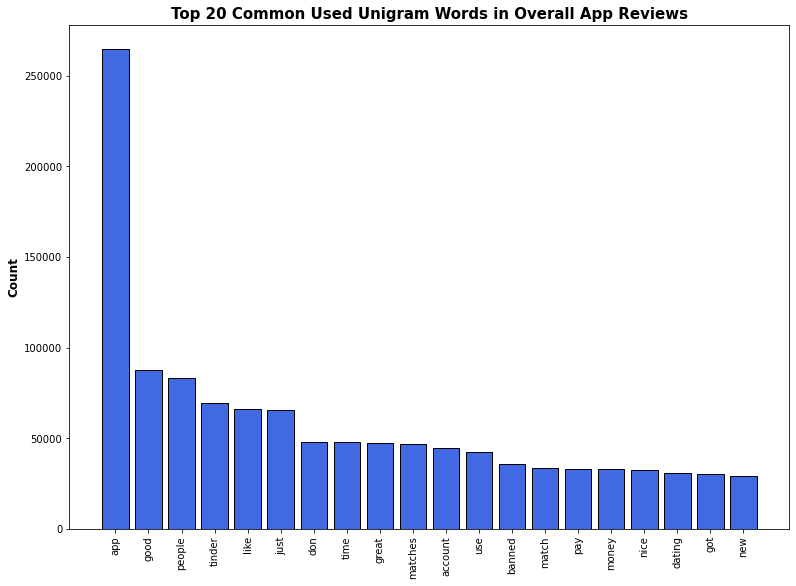

In [37]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df2['uni_reviews'], height = df2['uni_count'], color = 'royalblue', edgecolor = 'black')
plt.title("Top 20 Common Used Unigram Words in Overall App Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

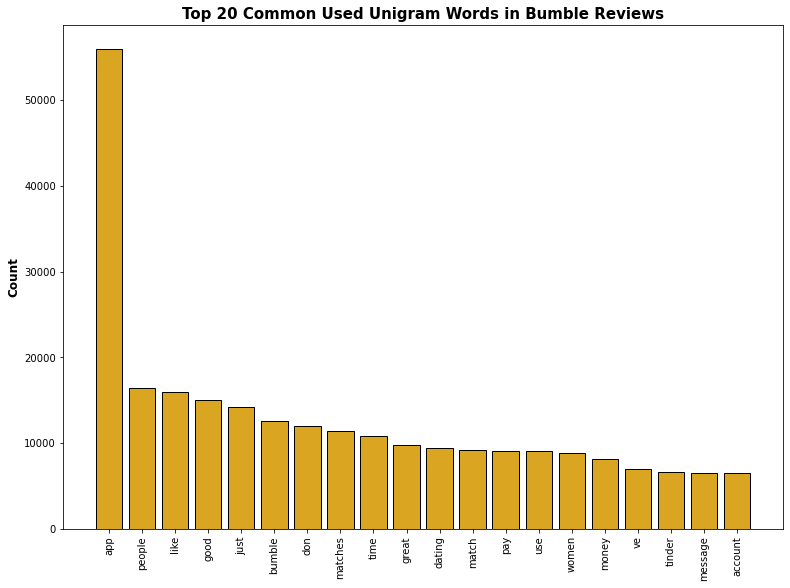

In [38]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df_bum3['uni_reviews'], height = df_bum3['uni_count'], color = 'goldenrod', edgecolor = 'black')
plt.title("Top 20 Common Used Unigram Words in Bumble Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

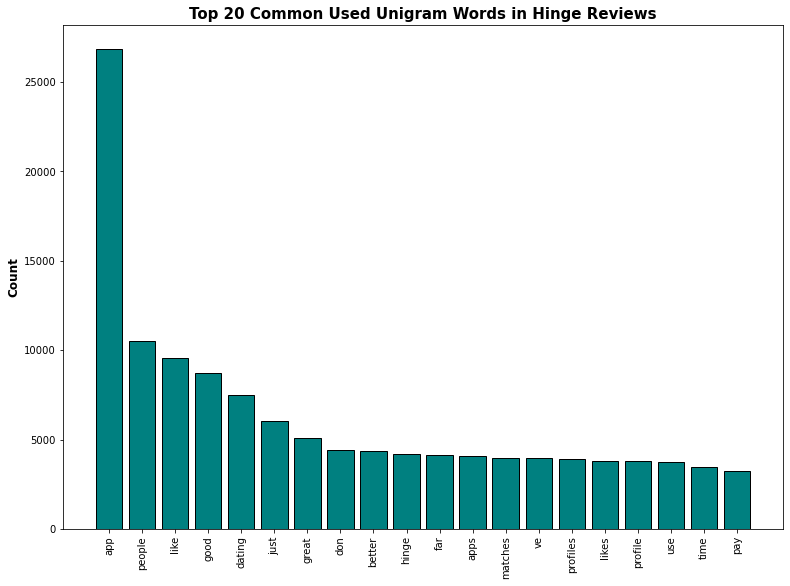

In [39]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df_hin3['uni_reviews'], height = df_hin3['uni_count'], color = 'teal', edgecolor = 'black')
plt.title("Top 20 Common Used Unigram Words in Hinge Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

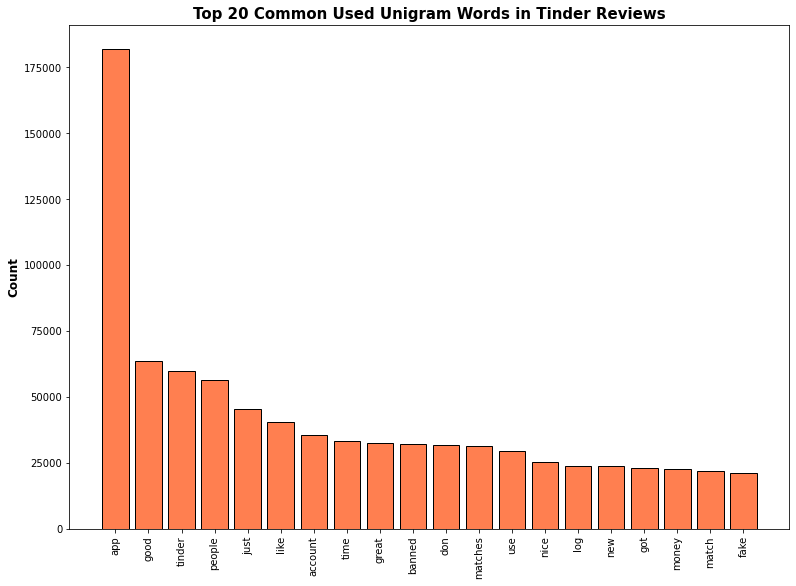

In [40]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df_tin3['uni_reviews'], height = df_tin3['uni_count'], color = 'coral', edgecolor = 'black')
plt.title("Top 20 Common Used Unigram Words in Tinder Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

### Top Bigram Words After Removing Stop Words

In [41]:
cmn_wds = getTopKWords(2, df['content'], 20)
cmn_wdsB = getTopKWords(2, df_bum2['content'], 20)
cmn_wdsH = getTopKWords(2, df_hin2['content'], 20)
cmn_wdsT = getTopKWords(2, df_tin2['content'], 20)

dfT = pd.DataFrame(cmn_wds, columns = ['Reviews', 'Count'])
dfT_B = pd.DataFrame(cmn_wdsB, columns = ['Reviews', 'Count'])
dfT_H = pd.DataFrame(cmn_wdsH, columns = ['Reviews', 'Count'])
dfT_T = pd.DataFrame(cmn_wdsH, columns = ['Reviews', 'Count'])

df2['bi_reviews'] = dfT['Reviews']
df2['bi_count'] = dfT['Count']
df_bum3['bi_reviews'] = dfT_B['Reviews']
df_bum3['bi_count'] = dfT_B['Count']
df_hin3['bi_reviews'] = dfT_H['Reviews']
df_hin3['bi_count'] = dfT_H['Count']
df_tin3['bi_reviews'] = dfT_T['Reviews']
df_tin3['bi_count'] = dfT_T['Count']

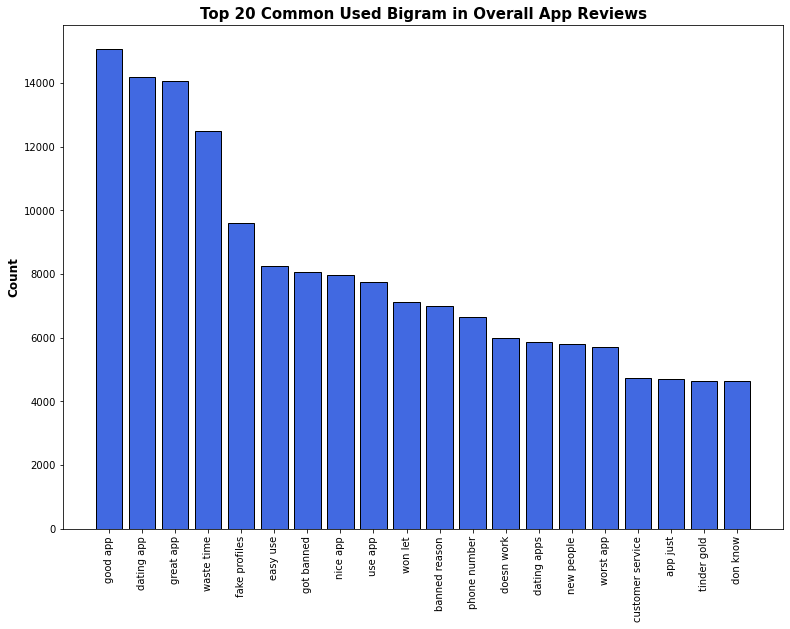

In [42]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df2['bi_reviews'], height = df2['bi_count'], color = 'royalblue', edgecolor = 'black')
plt.title("Top 20 Common Used Bigram in Overall App Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

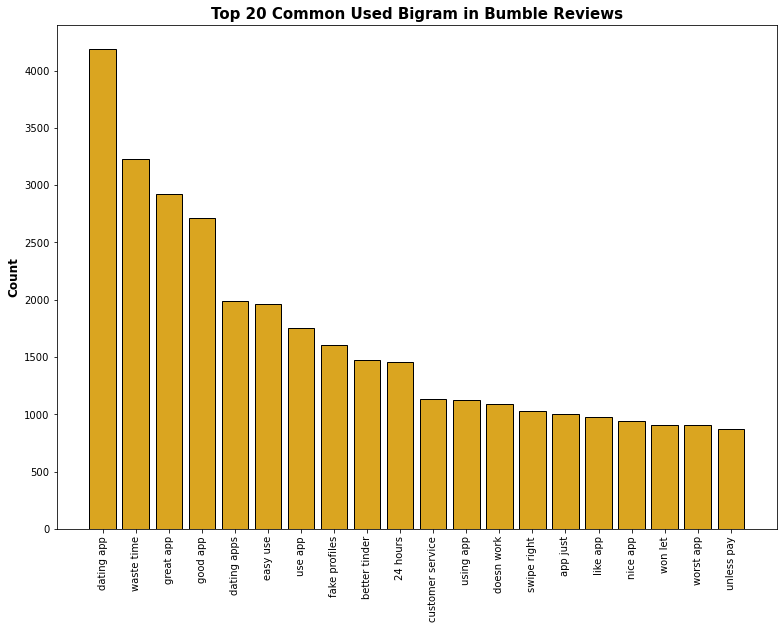

In [43]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df_bum3['bi_reviews'], height = df_bum3['bi_count'], color = 'goldenrod', edgecolor = 'black')
plt.title("Top 20 Common Used Bigram in Bumble Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

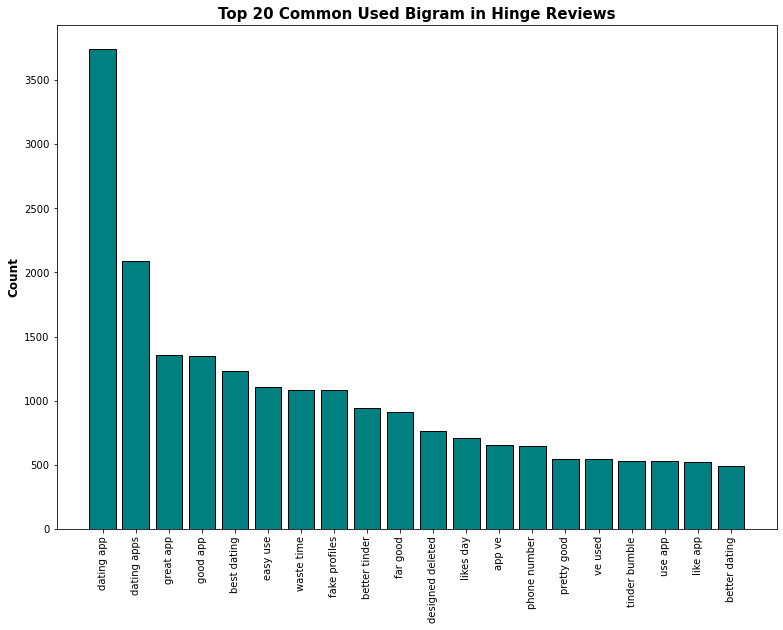

In [44]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df_hin3['bi_reviews'], height = df_hin3['bi_count'], color = 'teal', edgecolor = 'black')
plt.title("Top 20 Common Used Bigram in Hinge Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

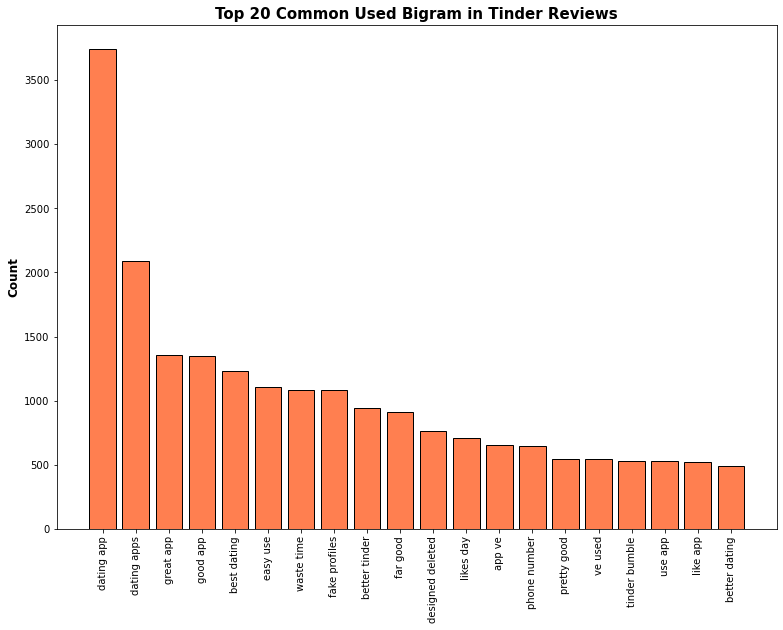

In [45]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df_tin3['bi_reviews'], height = df_tin3['bi_count'], color = 'coral', edgecolor = 'black')
plt.title("Top 20 Common Used Bigram in Tinder Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

### Top Trigram Words After Removing Stop Words

In [46]:
cmn_wds = getTopKWords(3, df['content'], 20)
cmn_wdsB = getTopKWords(3, df_bum2['content'], 20)
cmn_wdsH = getTopKWords(3, df_hin2['content'], 20)
cmn_wdsT = getTopKWords(3, df_tin2['content'], 20)

dfT = pd.DataFrame(cmn_wds, columns = ['Reviews', 'Count'])
dfT_B = pd.DataFrame(cmn_wdsB, columns = ['Reviews', 'Count'])
dfT_H = pd.DataFrame(cmn_wdsH, columns = ['Reviews', 'Count'])
dfT_T = pd.DataFrame(cmn_wdsH, columns = ['Reviews', 'Count'])

df2['tri_reviews'] = dfT['Reviews']
df2['tri_count'] = dfT['Count']
df_bum3['tri_reviews'] = dfT_B['Reviews']
df_bum3['tri_count'] = dfT_B['Count']
df_hin3['tri_reviews'] = dfT_H['Reviews']
df_hin3['tri_count'] = dfT_H['Count']
df_tin3['tri_reviews'] = dfT_T['Reviews']
df_tin3['tri_count'] = dfT_T['Count']

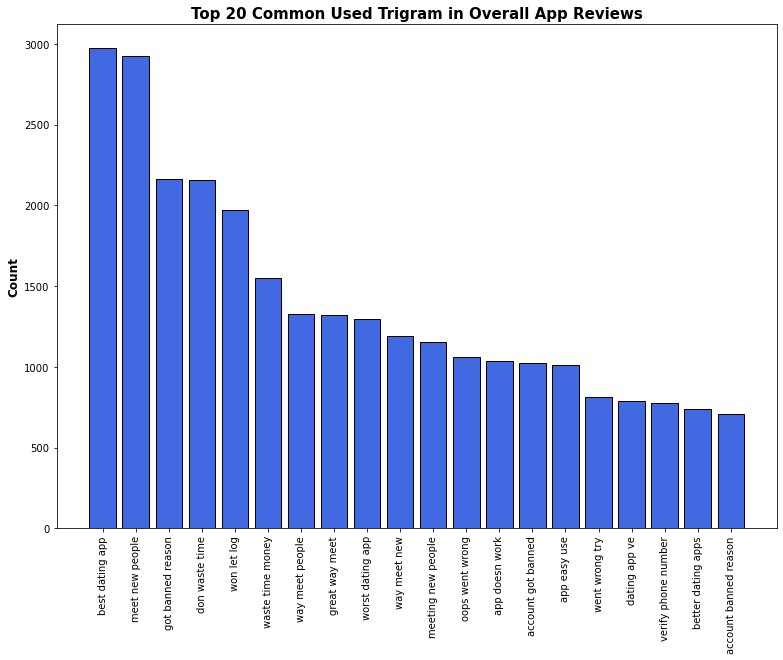

In [47]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df2['tri_reviews'], height = df2['tri_count'], color = 'royalblue', edgecolor = 'black')
plt.title("Top 20 Common Used Trigram in Overall App Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

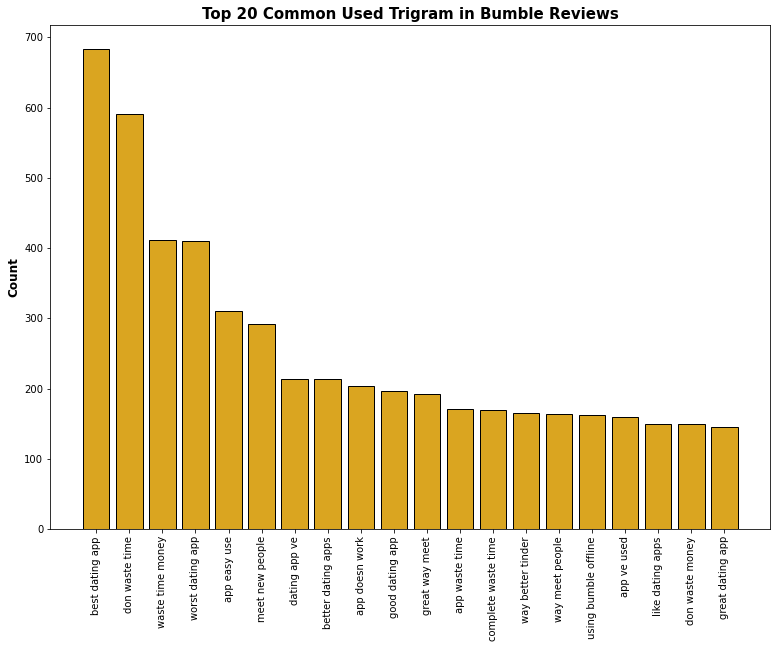

In [48]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df_bum3['tri_reviews'], height = df_bum3['tri_count'], color = 'goldenrod', edgecolor = 'black')
plt.title("Top 20 Common Used Trigram in Bumble Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

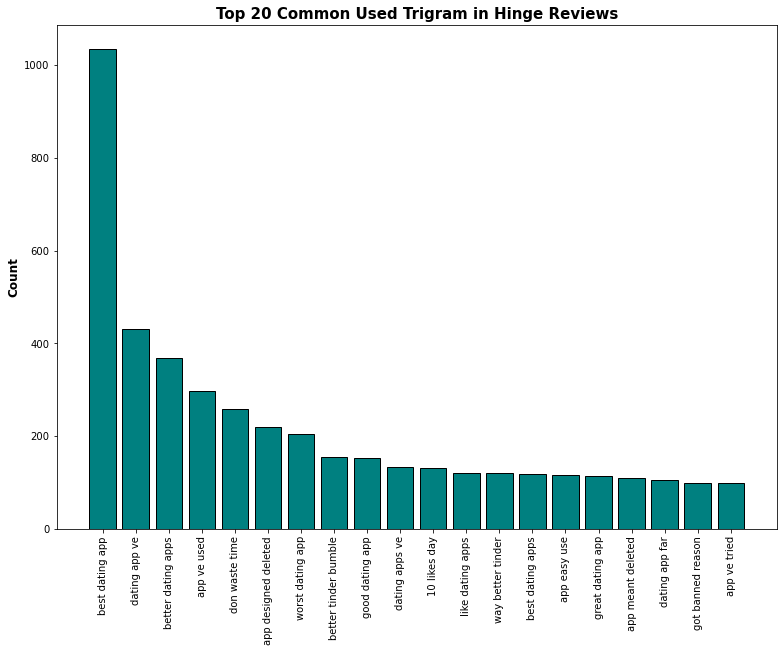

In [49]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df_hin3['tri_reviews'], height = df_hin3['tri_count'], color = 'teal', edgecolor = 'black')
plt.title("Top 20 Common Used Trigram in Hinge Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

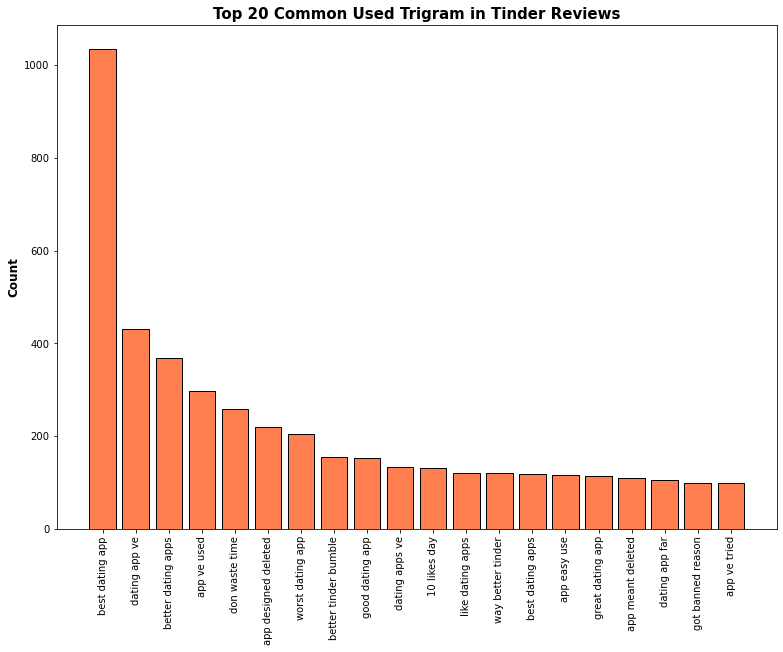

In [50]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df_tin3['tri_reviews'], height = df_tin3['tri_count'], color = 'coral', edgecolor = 'black')
plt.title("Top 20 Common Used Trigram in Tinder Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

### Distribtion of Top POS Tags of Review Corpus

POS = "Part-Of-Speech" Tagging is a process of assigning parts of speech to each word, such as noun, verb, adhective, etc

In [51]:
blob = TextBlob(str(df['content']))
df_pos = pd.DataFrame(blob.tags, columns = ['wds', 'pos'])
df_pos = df_pos.pos.value_counts()[:20]
df_pos = df_pos.to_frame().reset_index()
df_pos.rename(columns = {'index':'POS'}, inplace = True)
df_pos.rename(columns = {'pos':'Count'}, inplace = True)

# ------------------------------------------------- #

blob_bum = TextBlob(str(df_bum2['content']))
blob_hin = TextBlob(str(df_hin2['content']))
blob_tin = TextBlob(str(df_tin2['content']))

df_bum_pos = pd.DataFrame(blob_bum.tags, columns = ['wds', 'pos'])
df_bum_pos = df_bum_pos.pos.value_counts()[:20]
df_bum_pos = df_bum_pos.to_frame().reset_index()
df_bum_pos.rename(columns = {'index':'POS'}, inplace = True)
df_bum_pos.rename(columns = {'pos':'Count'}, inplace = True)

df_hin_pos = pd.DataFrame(blob_hin.tags, columns = ['wds', 'pos'])
df_hin_pos = df_hin_pos.pos.value_counts()[:20]
df_hin_pos = df_hin_pos.to_frame().reset_index()
df_hin_pos.rename(columns = {'index':'POS'}, inplace = True)
df_hin_pos.rename(columns = {'pos':'Count'}, inplace = True)

df_tin_pos = pd.DataFrame(blob_tin.tags, columns = ['wds', 'pos'])
df_tin_pos = df_tin_pos.pos.value_counts()[:20]
df_tin_pos = df_tin_pos.to_frame().reset_index()
df_tin_pos.rename(columns = {'index':'POS'}, inplace = True)
df_tin_pos.rename(columns = {'pos':'Count'}, inplace = True)

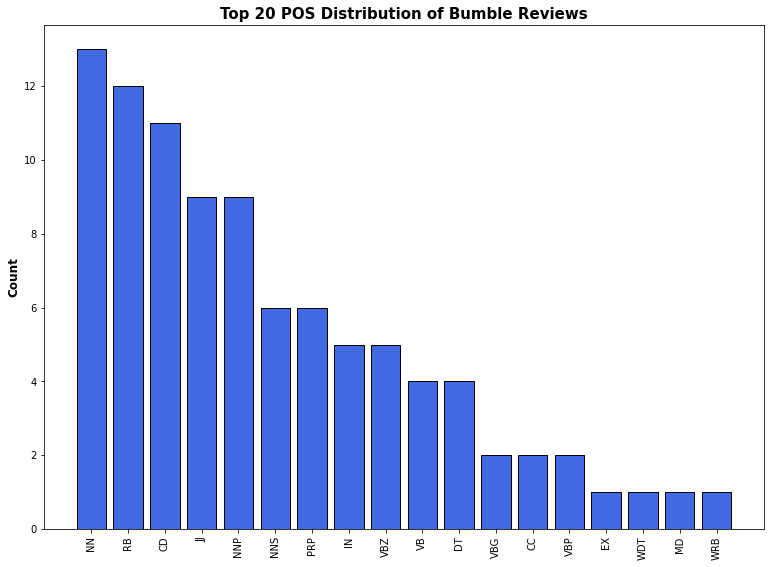

In [52]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df_pos['POS'], height = df_pos['Count'], color = 'royalblue', edgecolor = 'black')
plt.title("Top 20 POS Distribution of Bumble Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

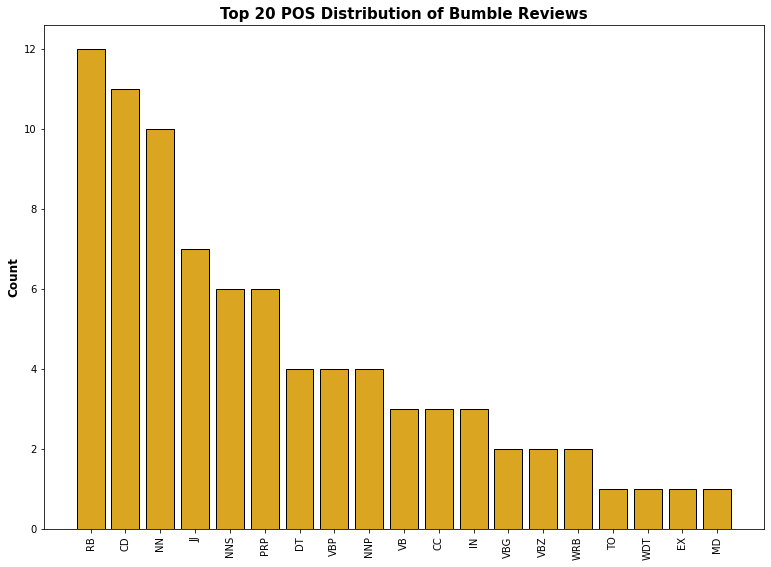

In [53]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df_bum_pos['POS'], height = df_bum_pos['Count'], color = 'goldenrod', edgecolor = 'black')
plt.title("Top 20 POS Distribution of Bumble Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

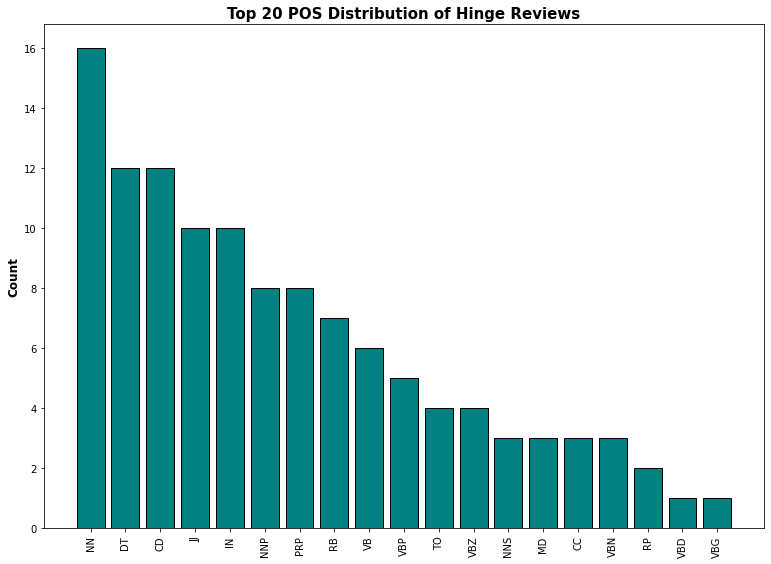

In [54]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df_hin_pos['POS'], height = df_hin_pos['Count'], color = 'teal', edgecolor = 'black')
plt.title("Top 20 POS Distribution of Hinge Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

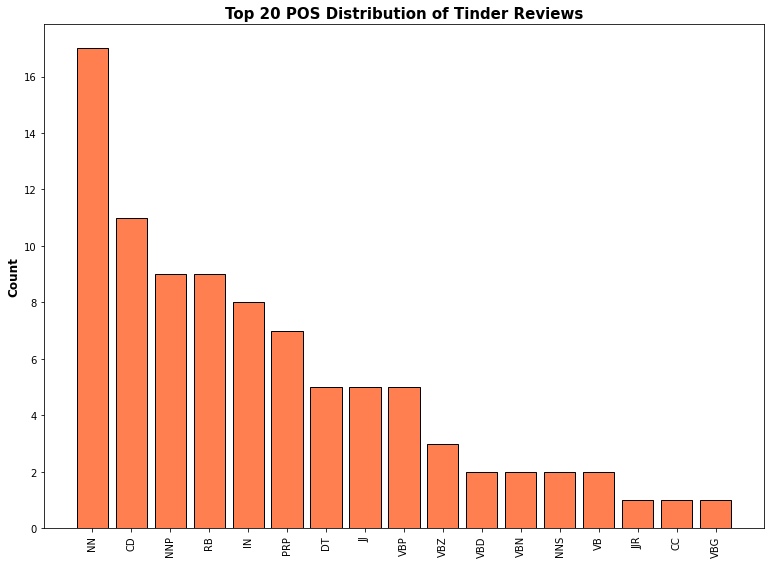

In [67]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df_tin_pos['POS'], height = df_tin_pos['Count'], color = 'coral', edgecolor = 'black')
plt.title("Top 20 POS Distribution of Tinder Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()